### Rewards

### Testing model trained using DDPG + HER with Parameter Tuning

In [4]:
%matplotlib inline
from tensorboard.backend.event_processing import event_accumulator
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings("ignore")
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

# function to open log and get reward
def getReward(log_dir):
    ea = event_accumulator.EventAccumulator(log_dir)
    ea.Reload()
    series = ea.scalars.Items('Reward')
    rewards = [s.value for s in series]
    df = pd.DataFrame(rewards, columns=['Reward'])
    df['MeanReward'] = df['Reward'].rolling(window=100, min_periods=2).mean()
    df['SD'] = df['Reward'].rolling(window=200, min_periods=2).std()
    return df

### Varying Batch Size and Hidden Layer Size

1. Batch size = 64, Hidden Layer Size = 256
2. Batch size = 128, Hidden Layer Size = 256
3. Batch size = 128, Hidden Layer Size = 512


INFO:tensorflow:No path found after ./FetchReach-v1_DDPG_HER/train_2018-04-28-12/events.out.tfevents.1524930896.pi-ubt
INFO:tensorflow:No path found after ./FetchReach-v1_DDPG_HER/train_2018-05-03-12/events.out.tfevents.1525365418.pi-ubt
INFO:tensorflow:No path found after ./FetchReach-v1_DDPG_HER_b128_h256/train_2018-05-03-20/events.out.tfevents.1525393115.pi-ubt
INFO:tensorflow:No path found after ./FetchReach-v1_DDPG_HER_b128_h512/train_2018-05-03-22/events.out.tfevents.1525399521.pi-ubt


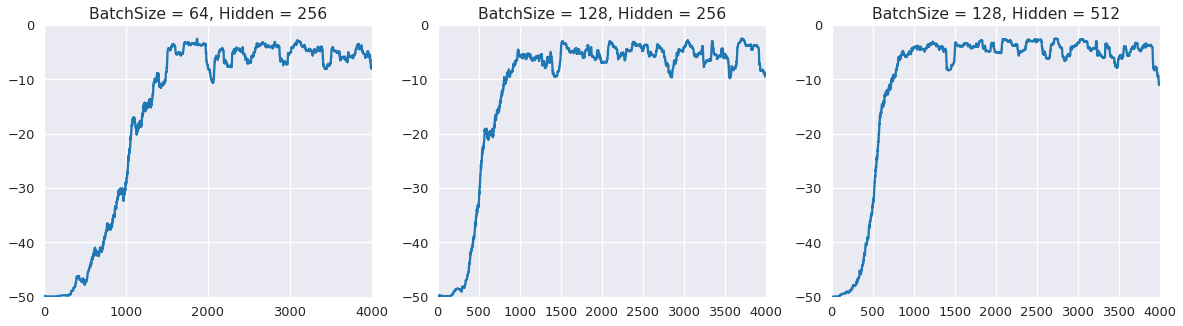

In [22]:
## Training Data

# load default model
l_ = []
log_dir = './FetchReach-v1_DDPG_HER'
train_paths = [p for p in os.listdir(log_dir) if p.startswith('train_')]
train_paths.sort()

# look at first + second training sessions
df_train1 = getReward(os.path.join(log_dir, train_paths[0]))
df_train2 = getReward(os.path.join(log_dir, train_paths[1]))
df_train = pd.concat((df_train1, df_train2), ignore_index=True)

# recompute training reward after concatenation
df_train['MeanReward'] = df_train['Reward'].rolling(window=100, min_periods=2).mean()
df_train['SD'] = df_train['Reward'].rolling(window=200, min_periods=2).std()
df_train['Parameters'] = 'BatchSize = 64, Hidden = 256'
l_.append(df_train)

# load models that varying hyperparameters
for i in [256, 512]:
    j = 128
    try:
        log_dir = './FetchReach-v1_DDPG_HER_b' + str(j) + '_h' + str(i)
        train_paths = [p for p in os.listdir(log_dir) if p.startswith('train_')]
        train_paths.sort()
        df = getReward(os.path.join(log_dir, train_paths[0]))
        df['Parameters'] = 'BatchSize = ' + str(j) + ', Hidden = ' + str(i)
        l_.append(df)
    except:
        continue
df = pd.concat(l_, ignore_index=True)

# plot reward
sns.set_style('darkgrid')
sns.set_context("talk")
params = df['Parameters'].unique().tolist()
f, axs = plt.subplots(1, len(params), figsize=(20, 5))
for i in range(len(params)):
    sns.tsplot(df[df['Parameters'] == params[i]]['MeanReward'], ax=axs[i])
    axs[i].set_title(params[i])
    axs[i].set_ylim(-50, 0)
plt.show()

INFO:tensorflow:No path found after ./FetchReach-v1_DDPG_HER/test_2018-05-03-13/events.out.tfevents.1525367467.pi-ubt
INFO:tensorflow:No path found after ./FetchReach-v1_DDPG_HER_b128_h256/test_2018-05-03-23/events.out.tfevents.1525403983.pi-ubt
INFO:tensorflow:No path found after ./FetchReach-v1_DDPG_HER_b128_h512/test_2018-05-03-23/events.out.tfevents.1525403721.pi-ubt


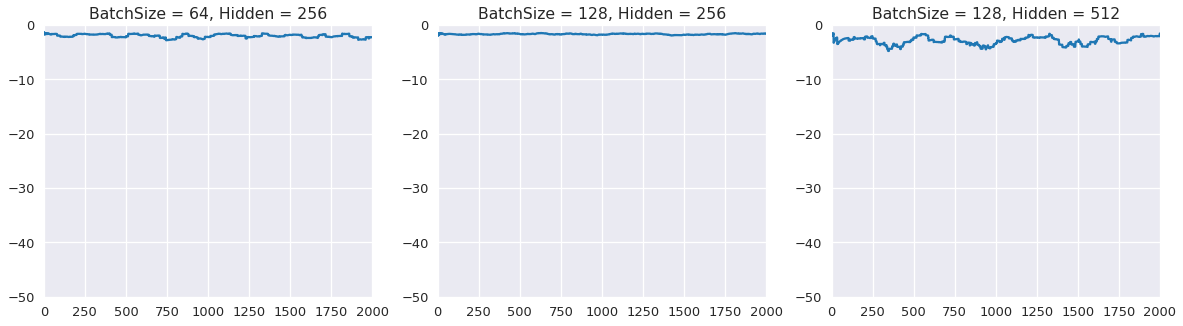

In [21]:
## Testing Data

# load default model
l_ = []
log_dir = './FetchReach-v1_DDPG_HER'
test_paths = [p for p in os.listdir(log_dir) if p.startswith('test_')]
test_paths.sort()

# look at second test session
df_test = getReward(os.path.join(log_dir, test_paths[1]))
df_test['Parameters'] = 'BatchSize = 64, Hidden = 256'
l_.append(df_test)

# load models that varying hyperparameters
for i in [256, 512]:
    j = 128
    try:
        log_dir = './FetchReach-v1_DDPG_HER_b' + str(j) + '_h' + str(i)
        test_paths = [p for p in os.listdir(log_dir) if p.startswith('test_')]
        test_paths.sort()
        df = getReward(os.path.join(log_dir, test_paths[0]))
        df['Parameters'] = 'BatchSize = ' + str(j) + ', Hidden = ' + str(i)
        l_.append(df)
    except:
        continue
df = pd.concat(l_, ignore_index=True)

# plot reward
sns.set_style('darkgrid')
sns.set_context("talk")
params = df['Parameters'].unique().tolist()
f, axs = plt.subplots(1, len(params), figsize=(20, 5))
for i in range(len(params)):
    sns.tsplot(df[df['Parameters'] == params[i]]['MeanReward'], ax=axs[i])
    axs[i].set_title(params[i])
    axs[i].set_ylim(-50, 0)
plt.show()

### Try new learning rates

1. Actor Learning = 0.001, Critic Learning = 0.01

INFO:tensorflow:No path found after ./FetchReach-v1_DDPG_HER_change_lr/train_2018-05-03-23/events.out.tfevents.1525405130.pi-ubt
INFO:tensorflow:No path found after ./FetchReach-v1_DDPG_HER_change_lr/test_2018-05-04-00/events.out.tfevents.1525408476.pi-ubt


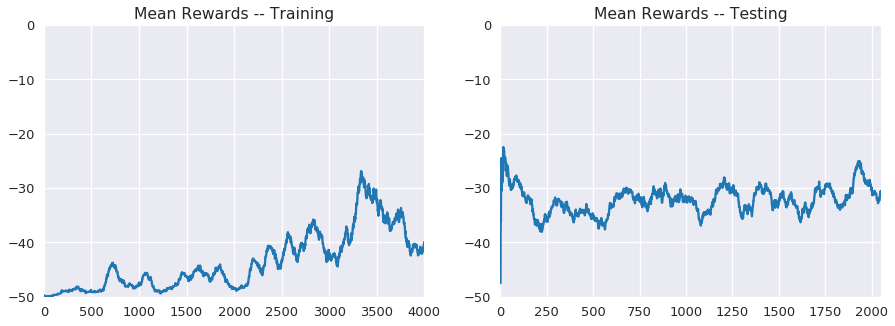

In [24]:
# load
log_dir = './FetchReach-v1_DDPG_HER_change_lr'
train_paths = [p for p in os.listdir(log_dir) if p.startswith('train_')]
train_paths.sort()
test_paths = [p for p in os.listdir(log_dir) if p.startswith('test_')]
test_paths.sort()

# look at first training session, first test session
df_train = getReward(os.path.join(log_dir, train_paths[0]))
df_test = getReward(os.path.join(log_dir, test_paths[0]))

# plot reward
sns.set_style('darkgrid')
sns.set_context("talk")
f, axs = plt.subplots(1, 2, figsize=(15, 5))
sns.tsplot(df_train['MeanReward'], ax=axs[0])
sns.tsplot(df_test['MeanReward'], ax=axs[1])
axs[0].set_title('Mean Rewards -- Training')
axs[1].set_title('Mean Rewards -- Testing')
axs[0].set_ylim(-50, 0)
axs[1].set_ylim(-50, 0)
plt.show()